## Computational Modelling of Social Systesm SS24
### Final Project - Computational Modelling of Bank Runs

In [1]:
from mesa import Model, Agent
from mesa.time import SimultaneousActivation
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer
import random


##### Define Class Agent

In [2]:
class GranovetterAgentBasic(Agent):
    
    def __init__(self, unique_id, engagement_threshold, model, withdrawal_amount):
        '''
         Create a new Granovetter agent.

         Args:
            unique_id: Unique identifier for the agent
            engagement_threshold: An agent's threshold for joining a bank run
            model: The model instance
            withdrawal_amount: The amount this agent will withdraw
        '''
        
        super().__init__(unique_id, model)
        self.unique_id = unique_id 
        self.engagement_threshold = engagement_threshold
        self.decision_reached = False
        self.engaged = False
        self.withdrawal_amount = withdrawal_amount #amount one agent can withdraw from the bank
    
    def step(self):
        '''
        Run one step of the agent.
        '''
        if self.engaged:
            return
        
        engaged_agents = [agent for agent in self.model.schedule.agents if agent.engaged]
        proportion_engaged = len(engaged_agents) / len(self.model.schedule.agents)
        
        if proportion_engaged >= self.engagement_threshold:
            self.decision_reached = True
            
    def advance(self):
        if self.engaged:
            return
        if self.decision_reached:
            self.engaged = True
            self.model.bank_assets -= self.withdrawal_amount # substract withdrawal from bank
            if self.model.bank_assets < 0: # if bank asssets smaller than 0, asset = zero
                self.model.bank_assets = 0

##### Define Class Model

In [3]:
class GranovetterModelBasic(Model):

    def __init__(self, N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal):
        '''
        Create a new Granovetter model.

         Args:
            N: Number of agents in the model
            mu: Mean of the thresholds distribution
            sigma: Standard deviation of the thresholds distribution
            initial_bank_assets: Initial assets of the bank
            mean_withdrawal: Mean withdrawal amount per agent
            std_withdrawal: Standard deviation of the withdrawal amount
        '''
        
        super().__init__()
        self.agent_counter = N
        self.mu = mu
        self.sigma = sigma
        self.initial_bank_assets = initial_bank_assets #initial bank assets (can be given as parameter)
        self.bank_assets = initial_bank_assets # current bank assets
        self.running = True
        self.schedule = SimultaneousActivation(self)
        self.engaged = 0
        self.bank_failed = False
        
        for i in range(N):
            threshold = self.random.gauss(mu, sigma) #random threshold from gauss
            threshold = min(max(threshold, 0), 1) #should be between zero and one in case of higher/lower values from gauss
            withdrawal_amount = max(0, self.random.gauss(mean_withdrawal, std_withdrawal)) #gaussian withdrawal amount, max is not negative
            agent = GranovetterAgentBasic(i, threshold, self, withdrawal_amount) # creates an agent
            self.schedule.add(agent)

    def step(self):
        self.engaged = 0
        self.schedule.step()
        # stock if bank assets are Zero all all are engaged
        if self.bank_assets <= 0 or all(agent.engaged for agent in self.schedule.agents): 
            self.running = False

        if self.bank_assets <=0:
            self.bank_failed = True




### Single Model - not that important

In [4]:
N = 100
mu = 0.1 #threshold
sigma = 0.1
initial_bank_assets = 10000000
mean_withdrawal = 100000
std_withdrawal = 1000


In [5]:
model = GranovetterModelBasic(N=N, mu=mu, sigma=sigma, 
                              initial_bank_assets=initial_bank_assets, 
                              mean_withdrawal=mean_withdrawal, 
                              std_withdrawal=std_withdrawal)

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The  Model ran for {} steps'.format(model.schedule.steps))

c:\Users\maxit\AppData\Local\Programs\Python\Python310\lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


The  Model ran for 3 steps


##### analysis of sinlge model

In [6]:
engaged_agents_threshold = []
unengaged_agents_threshold = []
engaged_agents_money = []
unengaged_agents_money = []
engaged_agents_withdrawal = []
unengaged_agents_withdrawal = []

for agent in model.schedule.agents:
    if agent.engaged:
        engaged_agents_threshold.append(agent.engagement_threshold)
        engaged_agents_withdrawal.append(agent.withdrawal_amount)
    else:
        unengaged_agents_threshold.append(agent.engagement_threshold)
        unengaged_agents_withdrawal.append(agent.withdrawal_amount)

number_agents = len(engaged_agents_threshold) + len(unengaged_agents_threshold)
percentage_active = len(engaged_agents_threshold) / number_agents

print("Engaged Agents: " + str(len(engaged_agents_threshold)))
print("Unengaged Agents: " + str(len(unengaged_agents_threshold)))
print("Percentage Active: " + str(percentage_active))
print(30*"-")
print("Engaged Agents Thresholds sorted: " + str(sorted(engaged_agents_threshold)))
print("Unengaged Agents Thresholds sorted: " + str(sorted(unengaged_agents_threshold)))
print(30*"-")



print("Engaged Agents Withdrawal Amounts: " + str(sorted(engaged_agents_withdrawal)))
print("Unengaged Agents Withdrawal Amounts: " + str(sorted(unengaged_agents_withdrawal)))
print(30*"-")

print("Current Bank Assets: " + str(model.bank_assets))
print("Total money withdrawn: " + str(initial_bank_assets - model.bank_assets))
print("Bank Failure: " + str(model.bank_failed))
print(30*"-")

print("1.1: Percentage active " + str(percentage_active) + " is smaller than mu = " + str(mu))
print("1.2 Active agents are calculated using the lists of engaged and unengaged agents")


Engaged Agents: 100
Unengaged Agents: 0
Percentage Active: 1.0
------------------------------
Engaged Agents Thresholds sorted: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0023388051109377445, 0.004002204046120561, 0.006826079912115923, 0.017823854658251412, 0.026469386126374797, 0.02900995714264132, 0.03649044959893798, 0.03737658037257008, 0.037742438411054485, 0.03785870406101674, 0.03955992208597203, 0.045903665652525696, 0.05233104724886549, 0.056453984195418166, 0.058536236655711754, 0.0609704974643632, 0.06462953880377142, 0.0686719913878433, 0.06966825417218969, 0.07358694824998949, 0.07415853308307387, 0.07449887028365104, 0.07897839768675477, 0.08239497961991789, 0.08591500439865984, 0.08962258461002456, 0.08981138761739277, 0.09041145528175049, 0.09046849336169846, 0.09194230771835499, 0.0927090500214376, 0.09605296341318867, 0.10250162935952964, 0.10594221737629511, 0.10617542741224714, 0.10661618633674508, 0.10892401425117622, 0.1094351466133964, 0.11447250452337542, 0

## run different parameters and visualize results

##### define function for model, takes different parameters for threshold, withdrawals, number iteration

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def run_model(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal, n_iter):

    #run the model as before
    model = GranovetterModelBasic(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal)
    
    #store bank assets over time
    bank_assets_over_time = []
    
    while model.running and model.schedule.steps < n_iter: # number of iterations n_iter can also be defined
        model.step()
        bank_assets_over_time.append(model.bank_assets)
    
    
    final_engaged_agents = len([agent for agent in model.schedule.agents if agent.engaged])
    return bank_assets_over_time, final_engaged_agents, model.schedule.steps,  model.bank_failed



##### first, fix sigma and run different thresholds

In [8]:
parameter_sets = []
n_iter = 10
N = 100 # i only used 100 since with e.g. 2500 
initial_bank_assets = 1000000
mean_withdrawal = 10000
std_withdrawal = 1000
sigma = 0.1

for mu in [0.15 + 0.01 * i for i in range(10)]:
    parameter_set = {
        'n_iter': n_iter,
        'N': N,
        'mu': mu,
        'sigma': sigma,
        'initial_bank_assets': initial_bank_assets,
        'mean_withdrawal': mean_withdrawal,
        'std_withdrawal': std_withdrawal
    }
    parameter_sets.append(parameter_set)

for param in parameter_sets:
    print(param)


{'n_iter': 10, 'N': 100, 'mu': 0.15, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.16, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.16999999999999998, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.19, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.2, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.21, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.22, 'sigma': 0.1, 'ini

In [9]:

results = []

for params in parameter_sets:
    bank_assets_over_time, final_engaged_agents, steps, bank_failed = run_model(**params)
    results.append({
        'params': params,
        'bank_assets_over_time': bank_assets_over_time,
        'final_engaged_agents': final_engaged_agents,
        'steps': steps,
        'bank_failed' : bank_failed
    })


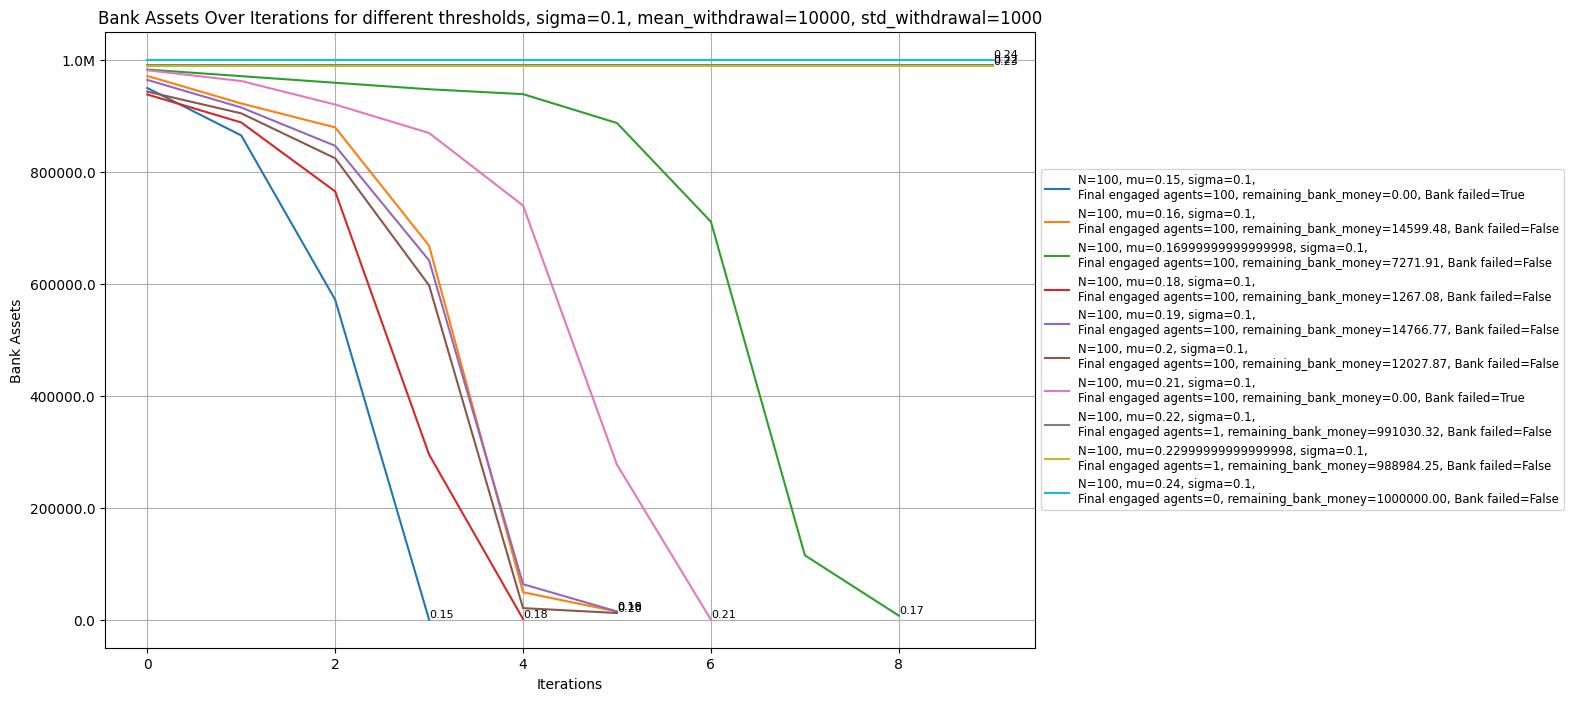

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 8))

# Create a function to stagger the text labels to avoid overlap
def stagger_labels(current_y, last_y, spacing=0.1):
    if abs(current_y - last_y) < spacing:
        return current_y + spacing
    return current_y

last_label_y = float('-inf')  # Initialize the last label y position to negative infinity

for i, result in enumerate(results):
    params = result['params']
    bank_assets_over_time = result['bank_assets_over_time']
    bank_failed = result['bank_failed']
    label = (
        f"N={params['N']}, mu={params['mu']}, sigma={params['sigma']},\n"
        f"Final engaged agents={result['final_engaged_agents']}, remaining_bank_money={result['bank_assets_over_time'][-1]:.2f}, Bank failed={bank_failed}"
    )
    plt.plot(bank_assets_over_time, label=label)
    
    # Calculate the position for the mu value label
    x_position = len(bank_assets_over_time) - 1
    y_position = bank_assets_over_time[-1]
    y_position = stagger_labels(y_position, last_label_y)
    last_label_y = y_position
    
    # Add mu value at the end of the line with staggered position
    plt.text(x_position, y_position, f"{params['mu']:.2f}", fontsize=8, verticalalignment='bottom')

plt.xlabel('Iterations')
plt.ylabel('Bank Assets')
plt.title(f'Bank Assets Over Iterations for different thresholds, sigma={sigma}, mean_withdrawal={mean_withdrawal}, std_withdrawal={std_withdrawal}')
plt.grid(True)

# Format y-axis to show numbers in millions if necessary
ax = plt.gca()
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x}')
ax.yaxis.set_major_formatter(formatter)

# Position the legend on the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.show()


### fix mu and try different sigmas

In [11]:
parameter_sets = []
n_iter = 10
N = 100
initial_bank_assets = 1000000
mean_withdrawal = 10000
std_withdrawal = 1000
mu = 0.18

for sigma in [0.00 + 0.01 * i for i in range(20)]:
    parameter_set = {
        'n_iter': n_iter,
        'N': N,
        'mu': mu,
        'sigma': sigma,
        'initial_bank_assets': initial_bank_assets,
        'mean_withdrawal': mean_withdrawal,
        'std_withdrawal': std_withdrawal
    }
    parameter_sets.append(parameter_set)

for param in parameter_sets:
    print(param)


{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.0, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.01, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.02, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.03, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.04, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.05, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.06, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.07, 'initial_ba

In [12]:

results = []

for params in parameter_sets:
    bank_assets_over_time, final_engaged_agents, steps, bank_failed = run_model(**params)
    results.append({
        'params': params,
        'bank_assets_over_time': bank_assets_over_time,
        'final_engaged_agents': final_engaged_agents,
        'steps': steps,
        'bank_failed' : bank_failed
    })


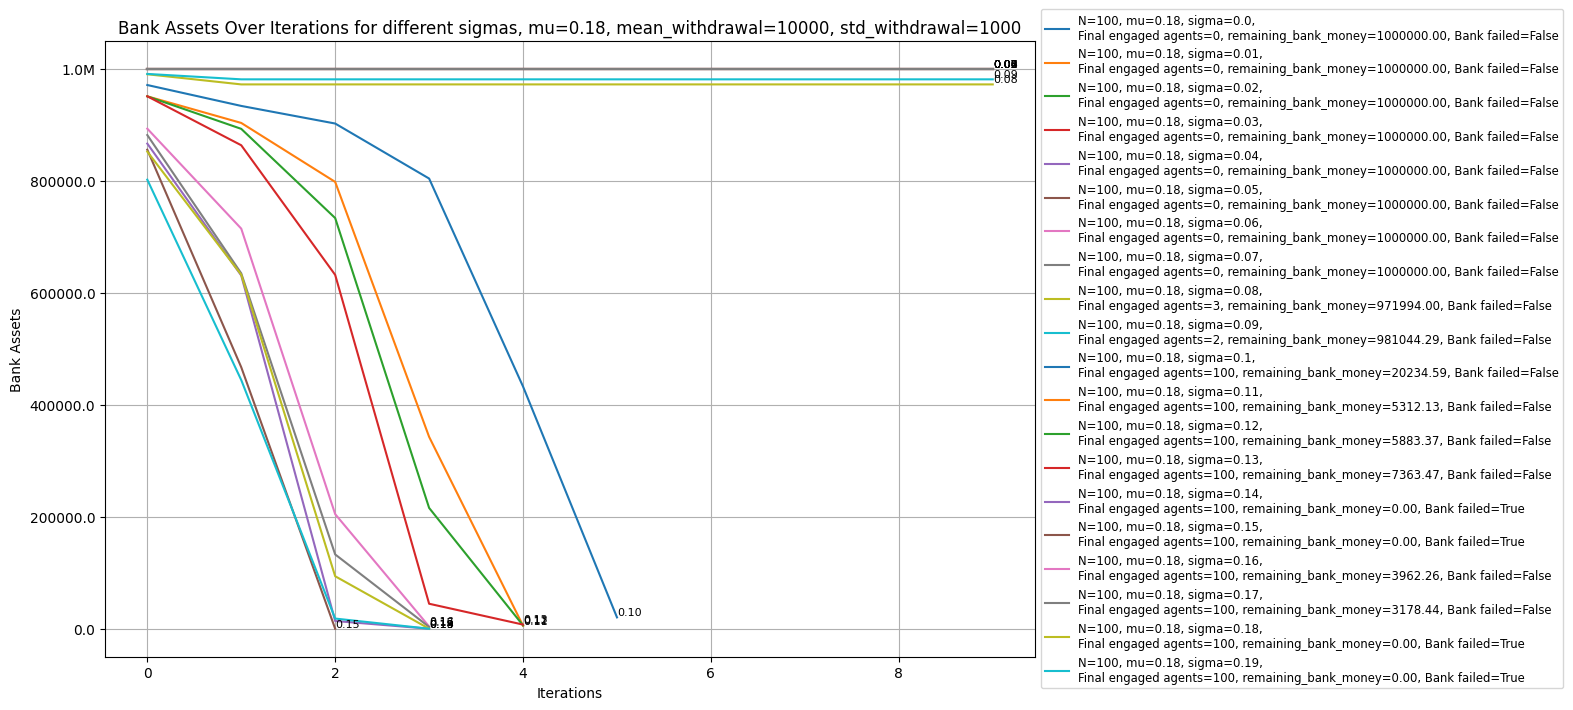

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 8))

# Create a function to stagger the text labels
def stagger_labels(index, total_labels, spacing=0.05):
    offset = (index % 2) * spacing - (spacing / 2)  # Alternating offsets
    return offset

for i, result in enumerate(results):
    params = result['params']
    bank_assets_over_time = result['bank_assets_over_time']
    bank_failed = result['bank_failed']
    label = (
        f"N={params['N']}, mu={params['mu']}, sigma={params['sigma']},\n"
        f"Final engaged agents={result['final_engaged_agents']}, remaining_bank_money={result['bank_assets_over_time'][-1]:.2f}, Bank failed={bank_failed}"
    )
    plt.plot(bank_assets_over_time, label=label)
    
    # Add sigma value at the end of the line with staggered position
    offset = stagger_labels(i, len(results))
    plt.text(len(bank_assets_over_time) - 1, bank_assets_over_time[-1] + offset, f"{params['sigma']:.2f}", 
             fontsize=8, verticalalignment='bottom')

plt.xlabel('Iterations')
plt.ylabel('Bank Assets')
plt.title(f'Bank Assets Over Iterations for different sigmas, mu={mu}, mean_withdrawal={mean_withdrawal}, std_withdrawal={std_withdrawal}')
plt.grid(True)

# Format y-axis to show numbers in millions if necessary
ax = plt.gca()
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x}')
ax.yaxis.set_major_formatter(formatter)

# Position the legend on the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.show()


Extention 1: Added withdrawal limits

In [14]:
class GranovetterAgentExtended(GranovetterAgentBasic):
    def __init__(self, unique_id, engagement_threshold, model, withdrawal_amount):
        super().__init__(unique_id, engagement_threshold, model, withdrawal_amount)

    def advance(self):
        if self.engaged:
            return
        if self.decision_reached:
            self.engaged = True
            # Check if withdrawal amount exceeds the bank's available assets
            if self.model.bank_assets < self.withdrawal_amount:
                self.model.bank_assets = 0
            else:
                self.model.bank_assets -= self.withdrawal_amount

class GranovetterModelExtended(GranovetterModelBasic):
    def __init__(self, N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal, withdrawal_limit):
        super().__init__(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal)
        self.withdrawal_limit = withdrawal_limit

    def step(self):
        self.engaged = 0
        self.schedule.step()
        if self.bank_assets <= self.withdrawal_limit or all(agent.engaged for agent in self.schedule.agents):
            self.running = False
        if self.bank_assets <= self.withdrawal_limit:
            self.bank_failed = True

In [15]:
N = 100
mu = 0.1 #threshold
sigma = 0.1
initial_bank_assets = 100000
mean_withdrawal = 100
std_withdrawal = 10000
withdrawal_limit = 5000

In [16]:
model = GranovetterModelExtended(N=N, mu=mu, sigma=sigma, 
                              initial_bank_assets=initial_bank_assets, 
                              mean_withdrawal=mean_withdrawal, 
                              std_withdrawal=std_withdrawal,
                              withdrawal_limit=withdrawal_limit)

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The  Model ran for {} steps'.format(model.schedule.steps))

The  Model ran for 2 steps


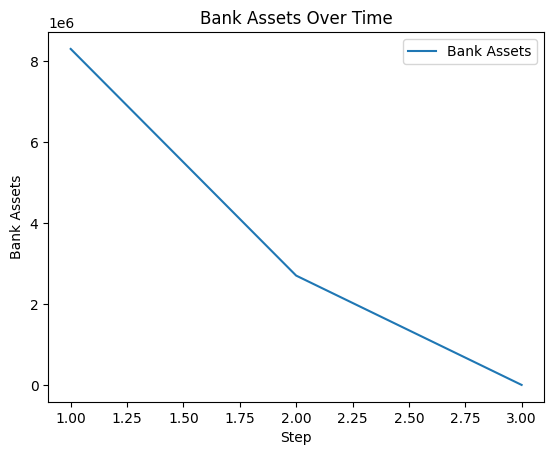

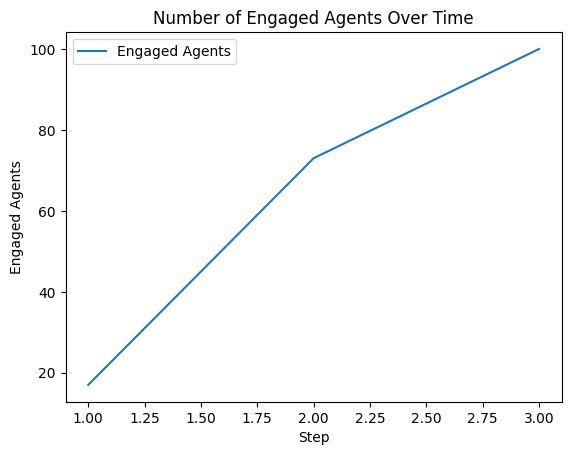

In [17]:
import matplotlib.pyplot as plt

# Extend the model to collect data
class GranovetterModelDataCollection(GranovetterModelExtended):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.data = {"step": [], "bank_assets": [], "engaged_agents": []}

    def step(self):
        super().step()
        engaged_agents = sum(agent.engaged for agent in self.schedule.agents)
        self.data["step"].append(self.schedule.time)
        self.data["bank_assets"].append(self.bank_assets)
        self.data["engaged_agents"].append(engaged_agents)

# Initialize the model
model = GranovetterModelDataCollection(N=100, mu=0.1, sigma=0.1, initial_bank_assets=10000000, mean_withdrawal=100000, std_withdrawal=1000, withdrawal_limit=500000)

# Run the model
while model.running:
    model.step()

# Plot the results
plt.figure()
plt.plot(model.data["step"], model.data["bank_assets"], label="Bank Assets")
plt.xlabel("Step")
plt.ylabel("Bank Assets")
plt.title("Bank Assets Over Time")
plt.legend()

plt.figure()
plt.plot(model.data["step"], model.data["engaged_agents"], label="Engaged Agents")
plt.xlabel("Step")
plt.ylabel("Engaged Agents")
plt.title("Number of Engaged Agents Over Time")
plt.legend()

plt.show()


In [18]:
N = 100
mu = 0.3  # Increased mean threshold to slow down engagement
sigma = 0.2  # Adjusted standard deviation for more varied thresholds
initial_bank_assets = 20000000  # Increased initial bank assets
mean_withdrawal = 50000  # Decreased mean withdrawal amount
std_withdrawal = 10000
withdrawal_limit = 100000

model = GranovetterModelExtended(N=N, mu=mu, sigma=sigma, 
                              initial_bank_assets=initial_bank_assets, 
                              mean_withdrawal=mean_withdrawal, 
                              std_withdrawal=std_withdrawal,
                              withdrawal_limit=withdrawal_limit)

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The  Model ran for {} steps'.format(model.schedule.steps))

The  Model ran for 6 steps


Extention 2:
Added a liquidity injection every x step in a specified amount

In [19]:
class GranovetterAgentExtended(GranovetterAgentBasic):
    def __init__(self, unique_id, engagement_threshold, model, withdrawal_amount):
        super().__init__(unique_id, engagement_threshold, model, withdrawal_amount)

    def advance(self):
        if self.engaged:
            return
        if self.decision_reached:
            self.engaged = True
            # Check if withdrawal amount exceeds the bank's available assets
            if self.model.bank_assets < self.withdrawal_amount:
                self.model.bank_assets = 0
            else:
                self.model.bank_assets -= self.withdrawal_amount

class GranovetterModelExtended(GranovetterModelBasic):
    def __init__(self, N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal, withdrawal_limit, liquidity_injection_amount, injection_frequency):
        super().__init__(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal)
        self.withdrawal_limit = withdrawal_limit
        self.liquidity_injection_amount = liquidity_injection_amount
        self.injection_frequency = injection_frequency
        self.step_count = 0  # To keep track of the number of steps

        # Replace agents with GranovetterAgentExtended
        self.schedule = SimultaneousActivation(self)
        for i in range(N):
            threshold = self.random.gauss(mu, sigma)
            threshold = min(max(threshold, 0), 1)
            withdrawal_amount = max(0, self.random.gauss(mean_withdrawal, std_withdrawal))
            agent = GranovetterAgentExtended(i, threshold, self, withdrawal_amount)
            self.schedule.add(agent)

    def step(self):
        self.engaged = 0
        self.schedule.step()
        
        self.step_count += 1  # Increment the step counter
        
        # Inject liquidity at specified intervals
        if self.step_count % self.injection_frequency == 0:
            self.bank_assets += self.liquidity_injection_amount
            print(f"Liquidity injection of {self.liquidity_injection_amount} at step {self.step_count}. New bank assets: {self.bank_assets}")

        if self.bank_assets <= self.withdrawal_limit or all(agent.engaged for agent in self.schedule.agents):
            self.running = False
        if self.bank_assets <= self.withdrawal_limit:
            self.bank_failed = True


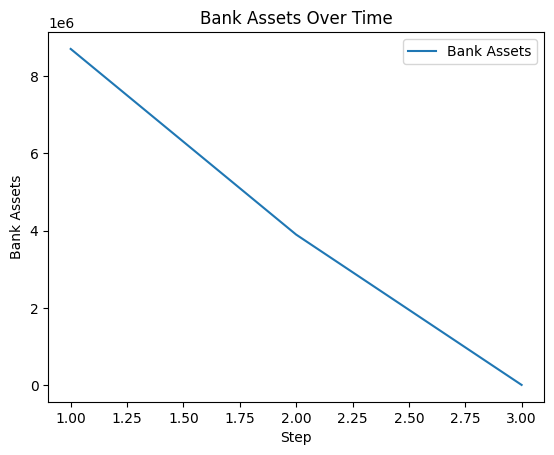

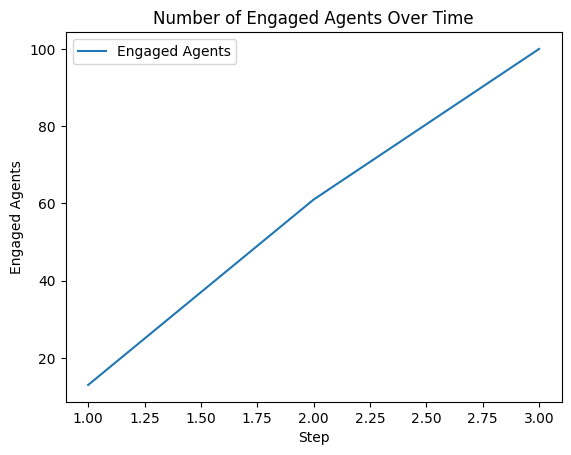

In [20]:
import matplotlib.pyplot as plt

# Extend the model to collect data
class GranovetterModelDataCollection(GranovetterModelExtended):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.data = {"step": [], "bank_assets": [], "engaged_agents": []}

    def step(self):
        super().step()
        engaged_agents = sum(agent.engaged for agent in self.schedule.agents)
        self.data["step"].append(self.schedule.time)
        self.data["bank_assets"].append(self.bank_assets)
        self.data["engaged_agents"].append(engaged_agents)

# Initialize the model
model = GranovetterModelDataCollection(N=100, mu=0.1, sigma=0.1, initial_bank_assets=10000000, mean_withdrawal=100000, std_withdrawal=1000, withdrawal_limit=500000, liquidity_injection_amount=500000, injection_frequency=5)

# Run the model
while model.running:
    model.step()

# Plot the results
plt.figure()
plt.plot(model.data["step"], model.data["bank_assets"], label="Bank Assets")
plt.xlabel("Step")
plt.ylabel("Bank Assets")
plt.title("Bank Assets Over Time")
plt.legend()

plt.figure()
plt.plot(model.data["step"], model.data["engaged_agents"], label="Engaged Agents")
plt.xlabel("Step")
plt.ylabel("Engaged Agents")
plt.title("Number of Engaged Agents Over Time")
plt.legend()

plt.show()


In [28]:
N = 100
mu = 0.3  # Increased mean threshold to slow down engagement
sigma = 0.2  # Adjusted standard deviation for more varied thresholds
initial_bank_assets = 20000000  # Increased initial bank assets
mean_withdrawal = 50000  # Decreased mean withdrawal amount
std_withdrawal = 10000
withdrawal_limit = 100000
liquidity_injection_amount=90000
injection_frequency=3

model = GranovetterModelExtended(N=N, mu=mu, sigma=sigma, 
                              initial_bank_assets=initial_bank_assets, 
                              mean_withdrawal=mean_withdrawal, 
                              std_withdrawal=std_withdrawal,
                              withdrawal_limit=withdrawal_limit,
                              liquidity_injection_amount=liquidity_injection_amount,
                              injection_frequency=injection_frequency)

while model.running and model.schedule.steps < 100:
    model.step()
                            
print('The  Model ran for {} steps'.format(model.schedule.steps))

Liquidity injection of 90000 at step 3. New bank assets: 18615897.348128285
Liquidity injection of 90000 at step 6. New bank assets: 15085378.077408025
The  Model ran for 6 steps


Liquidity injection of 90000 at step 3. New bank assets: 19567951.60123449
Liquidity injection of 90000 at step 6. New bank assets: 17299394.640669897


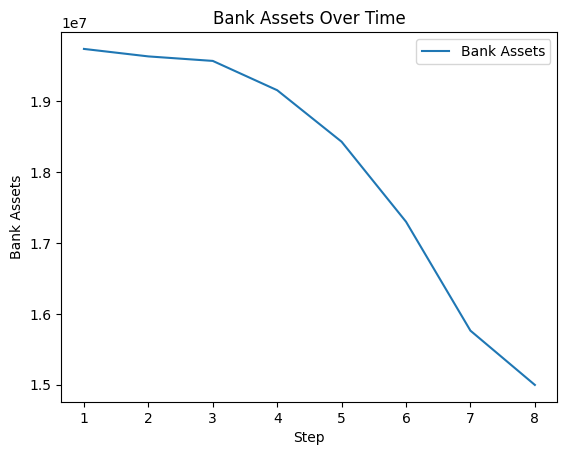

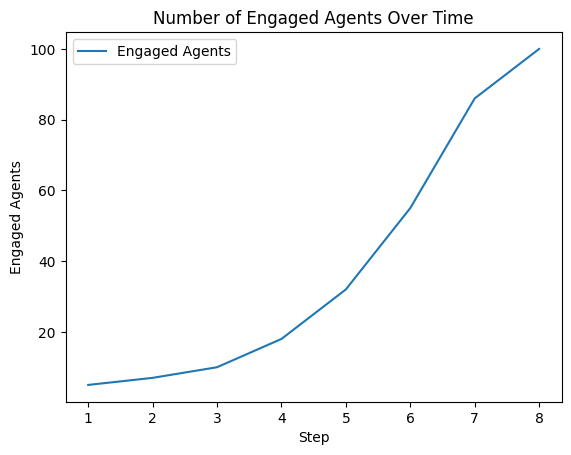

In [29]:
import matplotlib.pyplot as plt

# Extend the model to collect data
class GranovetterModelDataCollection(GranovetterModelExtended):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.data = {"step": [], "bank_assets": [], "engaged_agents": []}

    def step(self):
        super().step()
        engaged_agents = sum(agent.engaged for agent in self.schedule.agents)
        self.data["step"].append(self.schedule.time)
        self.data["bank_assets"].append(self.bank_assets)
        self.data["engaged_agents"].append(engaged_agents)

# Initialize the model
model = GranovetterModelDataCollection(N=N, mu=mu, sigma=sigma, initial_bank_assets=initial_bank_assets, mean_withdrawal=mean_withdrawal, std_withdrawal=std_withdrawal, withdrawal_limit=withdrawal_limit, liquidity_injection_amount=liquidity_injection_amount, injection_frequency=injection_frequency)

# Run the model
while model.running:
    model.step()

# Plot the results
plt.figure()
plt.plot(model.data["step"], model.data["bank_assets"], label="Bank Assets")
plt.xlabel("Step")
plt.ylabel("Bank Assets")
plt.title("Bank Assets Over Time")
plt.legend()

plt.figure()
plt.plot(model.data["step"], model.data["engaged_agents"], label="Engaged Agents")
plt.xlabel("Step")
plt.ylabel("Engaged Agents")
plt.title("Number of Engaged Agents Over Time")
plt.legend()

plt.show()

Fixing mu and sigma on the extended model; code is collapsed

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def run_model(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal, withdrawal_limit, liquidity_injection_amount, injection_frequency, n_iter):

    #run the model as before
    model = GranovetterModelDataCollection(N=N, mu=mu, sigma=sigma, initial_bank_assets=initial_bank_assets, mean_withdrawal=mean_withdrawal, std_withdrawal=std_withdrawal, withdrawal_limit=withdrawal_limit, liquidity_injection_amount=liquidity_injection_amount, injection_frequency=injection_frequency)
    
    #store bank assets over time
    bank_assets_over_time = []
    
    while model.running and model.schedule.steps < n_iter: # number of iterations n_iter can also be defined
        model.step()
        bank_assets_over_time.append(model.bank_assets)
    
    
    final_engaged_agents = len([agent for agent in model.schedule.agents if agent.engaged])
    return bank_assets_over_time, final_engaged_agents, model.schedule.steps,  model.bank_failed



In [32]:
parameter_sets = []
n_iter = 10
N = 100 # i only used 100 since with e.g. 2500 
initial_bank_assets = 1000000
mean_withdrawal = 10000
std_withdrawal = 1000
sigma = 0.1
withdrawal_limit = 10000
liquidity_injection_amount=90000
injection_frequency=3

for mu in [0.15 + 0.01 * i for i in range(10)]:
    parameter_set = {
        'n_iter': n_iter,
        'N': N,
        'mu': mu,
        'sigma': sigma,
        'initial_bank_assets': initial_bank_assets,
        'mean_withdrawal': mean_withdrawal,
        'std_withdrawal': std_withdrawal,
        'withdrawal_limit': withdrawal_limit,
        'liquidity_injection_amount': liquidity_injection_amount,
        'injection_frequency': injection_frequency
    }
    parameter_sets.append(parameter_set)

for param in parameter_sets:
    print(param)

{'n_iter': 10, 'N': 100, 'mu': 0.15, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.16, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.16999999999999998, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.19, 'sigma': 0.1, 'initial_bank_assets': 1000000, 'mean_with

In [37]:

results = []

for params in parameter_sets:
    bank_assets_over_time, final_engaged_agents, steps, bank_failed = run_model(**params)
    results.append({
        'params': params,
        'bank_assets_over_time': bank_assets_over_time,
        'final_engaged_agents': final_engaged_agents,
        'steps': steps,
        'bank_failed' : bank_failed
    })


Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90

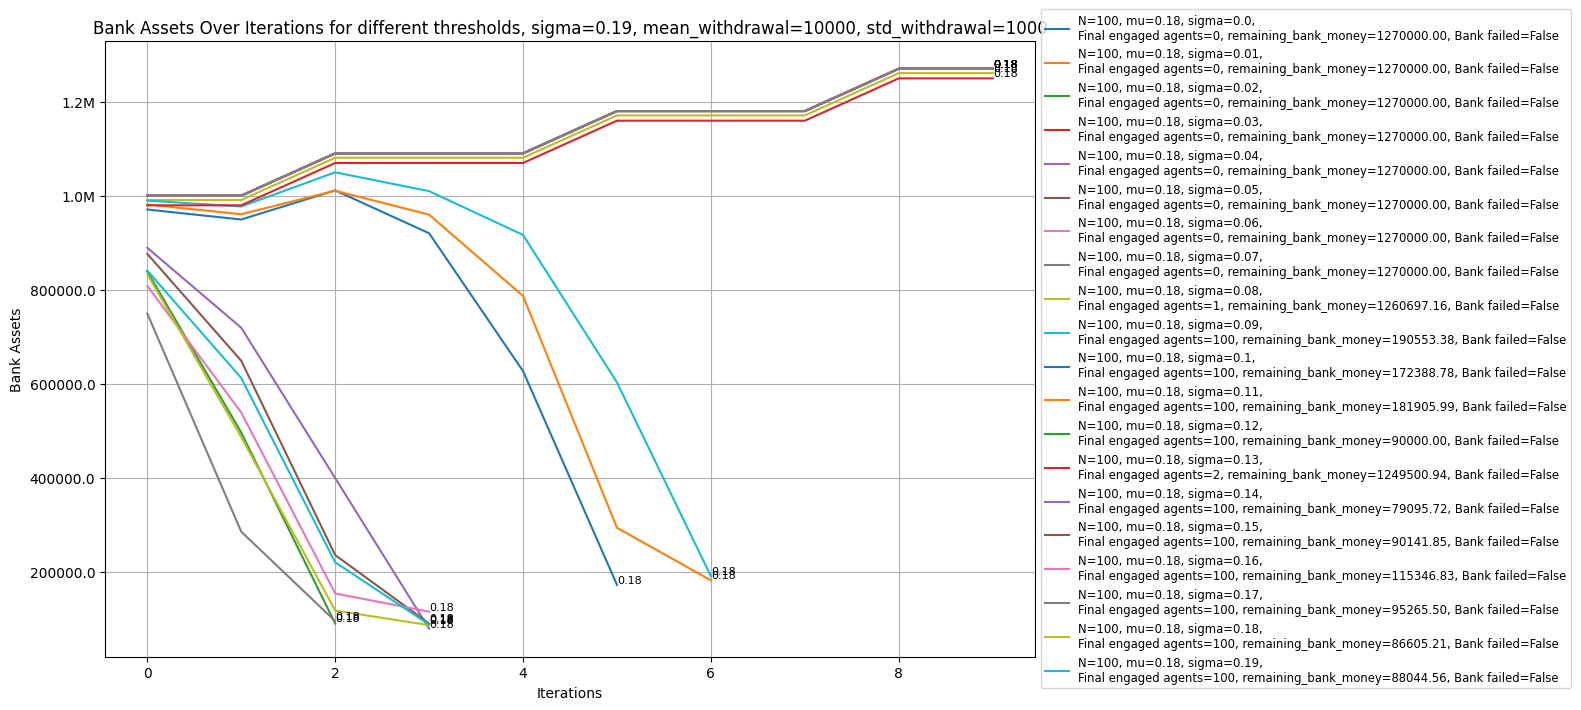

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 8))

# Create a function to stagger the text labels to avoid overlap
def stagger_labels(current_y, last_y, spacing=0.1):
    if abs(current_y - last_y) < spacing:
        return current_y + spacing
    return current_y

last_label_y = float('-inf')  # Initialize the last label y position to negative infinity

for i, result in enumerate(results):
    params = result['params']
    bank_assets_over_time = result['bank_assets_over_time']
    bank_failed = result['bank_failed']
    label = (
        f"N={params['N']}, mu={params['mu']}, sigma={params['sigma']},\n"
        f"Final engaged agents={result['final_engaged_agents']}, remaining_bank_money={result['bank_assets_over_time'][-1]:.2f}, Bank failed={bank_failed}"
    )
    plt.plot(bank_assets_over_time, label=label)
    
    # Calculate the position for the mu value label
    x_position = len(bank_assets_over_time) - 1
    y_position = bank_assets_over_time[-1]
    y_position = stagger_labels(y_position, last_label_y)
    last_label_y = y_position
    
    # Add mu value at the end of the line with staggered position
    plt.text(x_position, y_position, f"{params['mu']:.2f}", fontsize=8, verticalalignment='bottom')

plt.xlabel('Iterations')
plt.ylabel('Bank Assets')
plt.title(f'Bank Assets Over Iterations for different thresholds, sigma={sigma}, mean_withdrawal={mean_withdrawal}, std_withdrawal={std_withdrawal}')
plt.grid(True)

# Format y-axis to show numbers in millions if necessary
ax = plt.gca()
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x}')
ax.yaxis.set_major_formatter(formatter)

# Position the legend on the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.show()


In [39]:
parameter_sets = []
n_iter = 10
N = 100
initial_bank_assets = 1000000
mean_withdrawal = 10000
std_withdrawal = 1000
mu = 0.18
withdrawal_limit = 10000
liquidity_injection_amount=90000
injection_frequency=3

for sigma in [0.00 + 0.01 * i for i in range(20)]:
    parameter_set = {
        'n_iter': n_iter,
        'N': N,
        'mu': mu,
        'sigma': sigma,
        'initial_bank_assets': initial_bank_assets,
        'mean_withdrawal': mean_withdrawal,
        'std_withdrawal': std_withdrawal,
        'withdrawal_limit': withdrawal_limit,
        'liquidity_injection_amount': liquidity_injection_amount,
        'injection_frequency': injection_frequency
    }
    parameter_sets.append(parameter_set)

for param in parameter_sets:
    print(param)


{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.0, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.01, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.02, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.03, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10000, 'std_withdrawal': 1000, 'withdrawal_limit': 10000, 'liquidity_injection_amount': 90000, 'injection_frequency': 3}
{'n_iter': 10, 'N': 100, 'mu': 0.18, 'sigma': 0.04, 'initial_bank_assets': 1000000, 'mean_withdrawal': 10

In [40]:

results = []

for params in parameter_sets:
    bank_assets_over_time, final_engaged_agents, steps, bank_failed = run_model(**params)
    results.append({
        'params': params,
        'bank_assets_over_time': bank_assets_over_time,
        'final_engaged_agents': final_engaged_agents,
        'steps': steps,
        'bank_failed' : bank_failed
    })


Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90000 at step 3. New bank assets: 1090000
Liquidity injection of 90000 at step 6. New bank assets: 1180000
Liquidity injection of 90000 at step 9. New bank assets: 1270000
Liquidity injection of 90

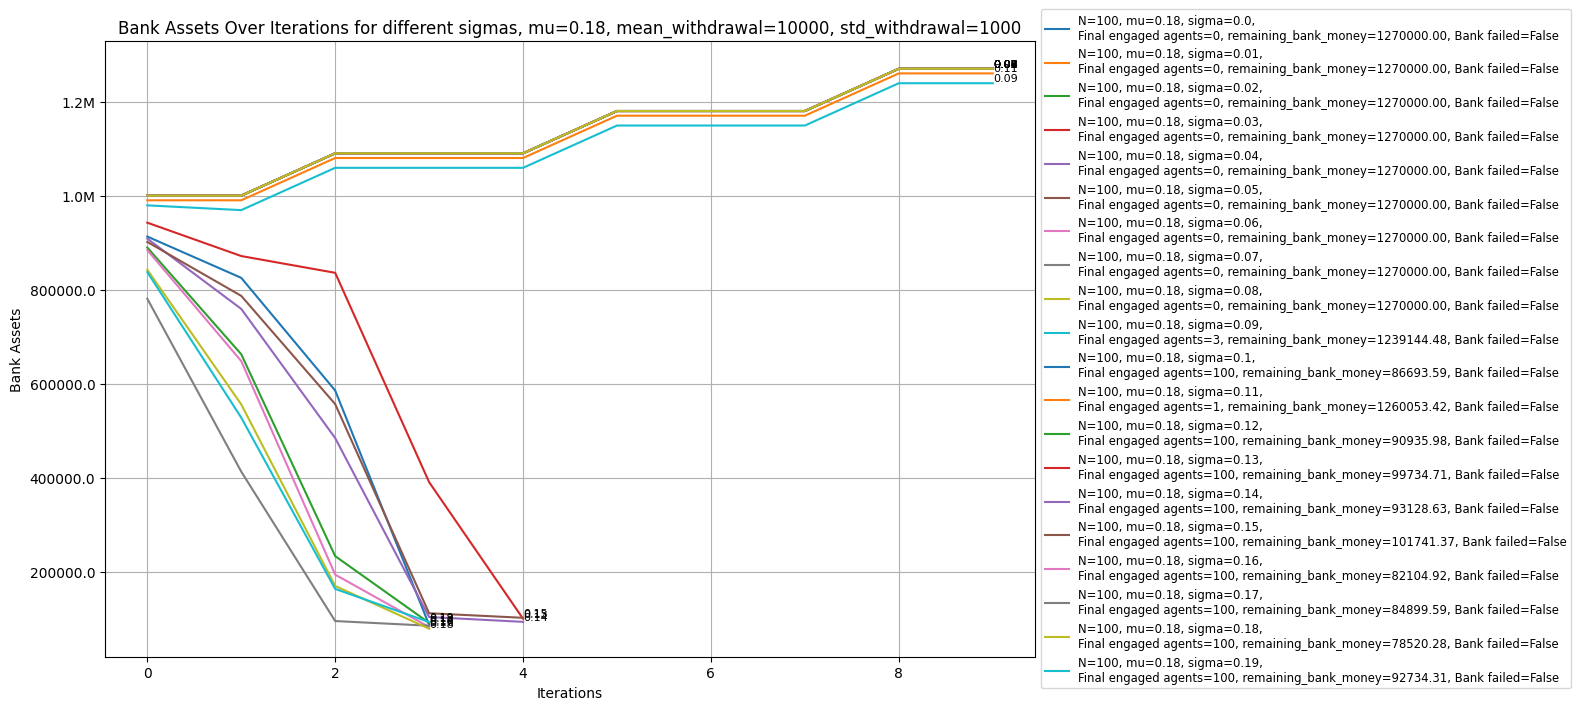

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 8))

# Create a function to stagger the text labels
def stagger_labels(index, total_labels, spacing=0.05):
    offset = (index % 2) * spacing - (spacing / 2)  # Alternating offsets
    return offset

for i, result in enumerate(results):
    params = result['params']
    bank_assets_over_time = result['bank_assets_over_time']
    bank_failed = result['bank_failed']
    label = (
        f"N={params['N']}, mu={params['mu']}, sigma={params['sigma']},\n"
        f"Final engaged agents={result['final_engaged_agents']}, remaining_bank_money={result['bank_assets_over_time'][-1]:.2f}, Bank failed={bank_failed}"
    )
    plt.plot(bank_assets_over_time, label=label)
    
    # Add sigma value at the end of the line with staggered position
    offset = stagger_labels(i, len(results))
    plt.text(len(bank_assets_over_time) - 1, bank_assets_over_time[-1] + offset, f"{params['sigma']:.2f}", 
             fontsize=8, verticalalignment='bottom')

plt.xlabel('Iterations')
plt.ylabel('Bank Assets')
plt.title(f'Bank Assets Over Iterations for different sigmas, mu={mu}, mean_withdrawal={mean_withdrawal}, std_withdrawal={std_withdrawal}')
plt.grid(True)

# Format y-axis to show numbers in millions if necessary
ax = plt.gca()
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x}')
ax.yaxis.set_major_formatter(formatter)

# Position the legend on the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.show()


Batch run and visualisation with different mu and different sigma

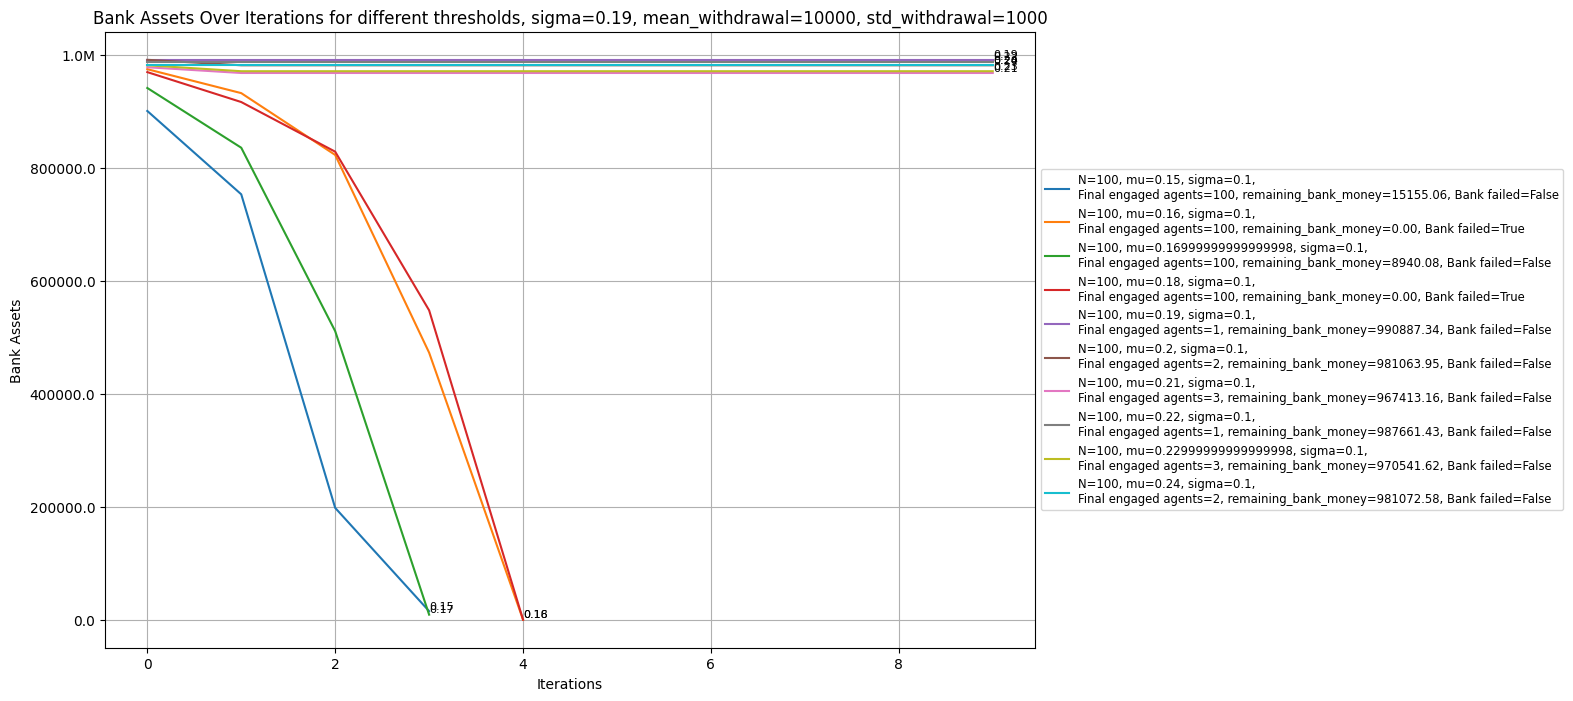

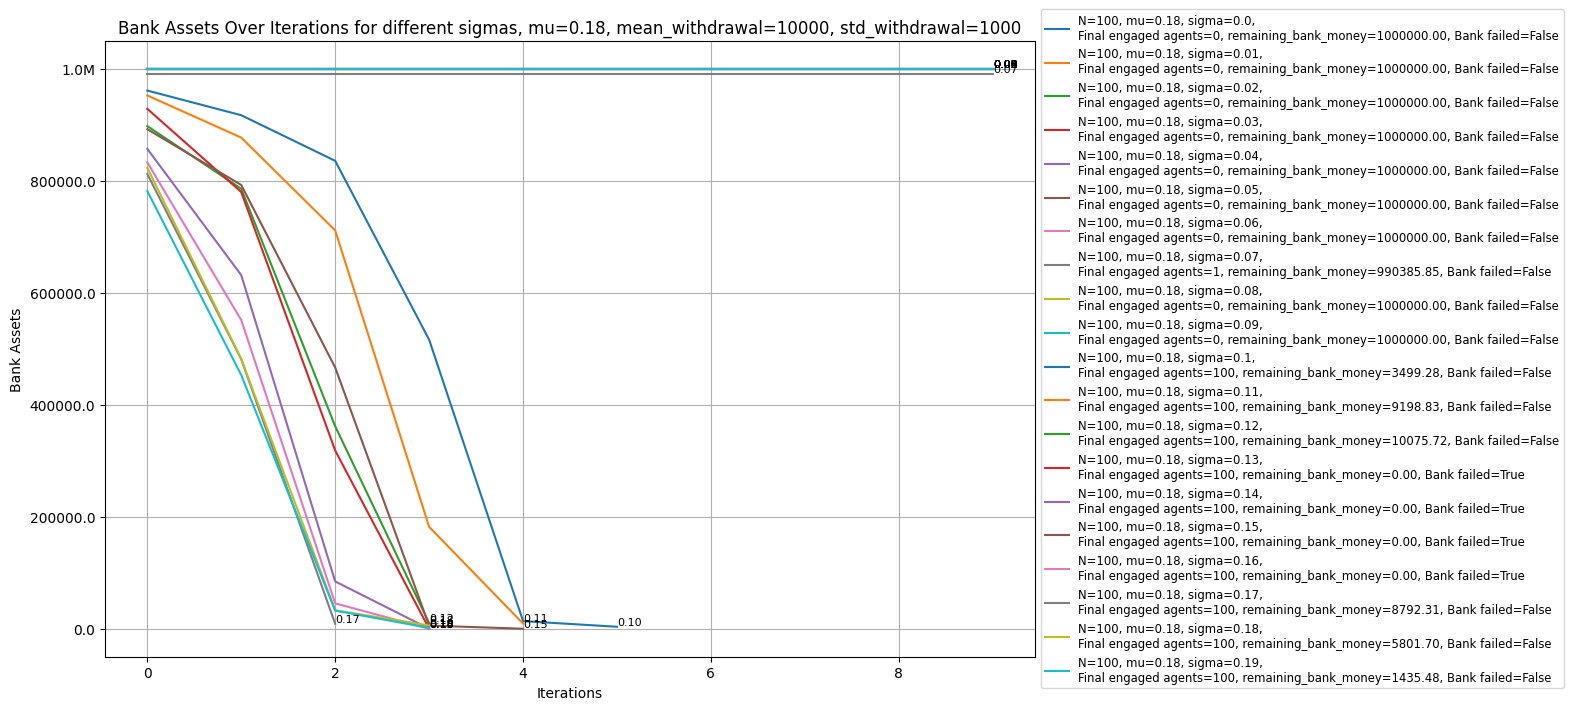

In [22]:
def run_model(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal, n_iter, max_steps=100):
    '''
    Run the Granovetter model.

    Args:
        N: Number of agents in the model
        mu: Mean of the thresholds distribution
        sigma: Standard deviation of the thresholds distribution
        initial_bank_assets: Initial assets of the bank
        mean_withdrawal: Mean withdrawal amount per agent
        std_withdrawal: Standard deviation of the withdrawal amount
        n_iter: Number of iterations to run the model
        max_steps: Maximum number of steps to run the model

    Returns:
        bank_assets_over_time: List of bank assets over time
        final_engaged_agents: Number of agents engaged at the end of the run
        steps: Number of steps the model ran
        bank_failed: Boolean indicating if the bank failed
    '''
    
    model = GranovetterModelBasic(N, mu, sigma, initial_bank_assets, mean_withdrawal, std_withdrawal)
    
    bank_assets_over_time = []
    
    while model.running and model.schedule.steps < min(n_iter, max_steps):
        model.step()
        bank_assets_over_time.append(model.bank_assets)
    
    final_engaged_agents = len([agent for agent in model.schedule.agents if agent.engaged])
    return bank_assets_over_time, final_engaged_agents, model.schedule.steps, model.bank_failed

# Batch run for different thresholds (mu)
parameter_sets_mu = []
n_iter = 10
N = 100
initial_bank_assets = 1000000
mean_withdrawal = 10000
std_withdrawal = 1000
sigma = 0.1
max_steps = 100

for mu in [0.15 + 0.01 * i for i in range(10)]:
    parameter_set = {
        'n_iter': n_iter,
        'N': N,
        'mu': mu,
        'sigma': sigma,
        'initial_bank_assets': initial_bank_assets,
        'mean_withdrawal': mean_withdrawal,
        'std_withdrawal': std_withdrawal,
        'max_steps': max_steps
    }
    parameter_sets_mu.append(parameter_set)

results_mu = []

for params in parameter_sets_mu:
    bank_assets_over_time, final_engaged_agents, steps, bank_failed = run_model(**params)
    results_mu.append({
        'params': params,
        'bank_assets_over_time': bank_assets_over_time,
        'final_engaged_agents': final_engaged_agents,
        'steps': steps,
        'bank_failed': bank_failed
    })

# Batch run for different standard deviations (sigma)
parameter_sets_sigma = []
mu = 0.18

for sigma in [0.00 + 0.01 * i for i in range(20)]:
    parameter_set = {
        'n_iter': n_iter,
        'N': N,
        'mu': mu,
        'sigma': sigma,
        'initial_bank_assets': initial_bank_assets,
        'mean_withdrawal': mean_withdrawal,
        'std_withdrawal': std_withdrawal,
        'max_steps': max_steps
    }
    parameter_sets_sigma.append(parameter_set)

results_sigma = []

for params in parameter_sets_sigma:
    bank_assets_over_time, final_engaged_agents, steps, bank_failed = run_model(**params)
    results_sigma.append({
        'params': params,
        'bank_assets_over_time': bank_assets_over_time,
        'final_engaged_agents': final_engaged_agents,
        'steps': steps,
        'bank_failed': bank_failed
    })

# Plotting results
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Plot for different thresholds (mu)
plt.figure(figsize=(12, 8))

for i, result in enumerate(results_mu):
    params = result['params']
    bank_assets_over_time = result['bank_assets_over_time']
    bank_failed = result['bank_failed']
    label = (
        f"N={params['N']}, mu={params['mu']}, sigma={params['sigma']},\n"
        f"Final engaged agents={result['final_engaged_agents']}, remaining_bank_money={result['bank_assets_over_time'][-1]:.2f}, Bank failed={bank_failed}"
    )
    plt.plot(bank_assets_over_time, label=label)
    
    # Add mu value at the end of the line with staggered position
    plt.text(len(bank_assets_over_time) - 1, bank_assets_over_time[-1], f"{params['mu']:.2f}", fontsize=8, verticalalignment='bottom')

plt.xlabel('Iterations')
plt.ylabel('Bank Assets')
plt.title(f'Bank Assets Over Iterations for different thresholds, sigma={sigma}, mean_withdrawal={mean_withdrawal}, std_withdrawal={std_withdrawal}')
plt.grid(True)

# Format y-axis to show numbers in millions if necessary
ax = plt.gca()
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x}')
ax.yaxis.set_major_formatter(formatter)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()

# Plot for different standard deviations (sigma)
plt.figure(figsize=(12, 8))

for i, result in enumerate(results_sigma):
    params = result['params']
    bank_assets_over_time = result['bank_assets_over_time']
    bank_failed = result['bank_failed']
    label = (
        f"N={params['N']}, mu={params['mu']}, sigma={params['sigma']},\n"
        f"Final engaged agents={result['final_engaged_agents']}, remaining_bank_money={result['bank_assets_over_time'][-1]:.2f}, Bank failed={bank_failed}"
    )
    plt.plot(bank_assets_over_time, label=label)
    
    # Add sigma value at the end of the line with staggered position
    plt.text(len(bank_assets_over_time) - 1, bank_assets_over_time[-1], f"{params['sigma']:.2f}", fontsize=8, verticalalignment='bottom')

plt.xlabel('Iterations')
plt.ylabel('Bank Assets')
plt.title(f'Bank Assets Over Iterations for different sigmas, mu={mu}, mean_withdrawal={mean_withdrawal}, std_withdrawal={std_withdrawal}')
plt.grid(True)

# Format y-axis to show numbers in millions if necessary
ax = plt.gca()
formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x}')
ax.yaxis.set_major_formatter(formatter)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.show()


Creating boxplots

<Figure size 1200x800 with 0 Axes>

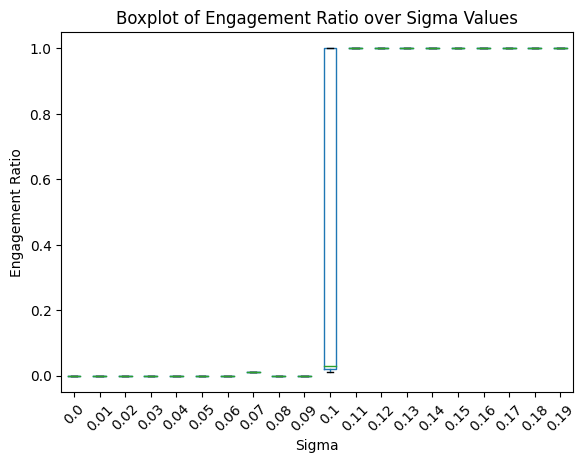

<Figure size 1200x800 with 0 Axes>

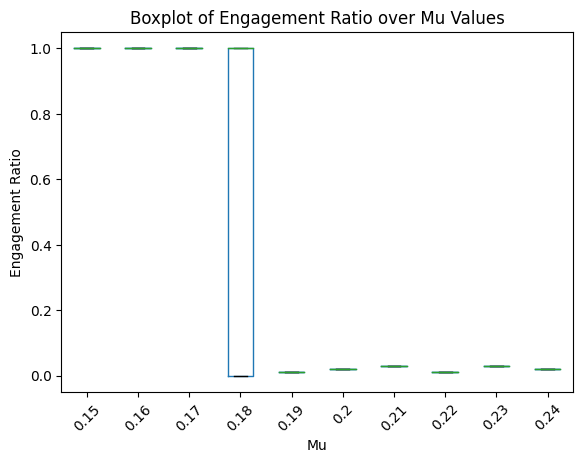

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_engagement_data(results):
    engagement_data = []
    for result in results:
        params = result['params']
        sigma = params['sigma']
        mu = params['mu']
        engagement_ratio = result['final_engaged_agents'] / params['N']
        engagement_data.append({'sigma': sigma, 'mu': mu, 'engagement_ratio': engagement_ratio})
    return engagement_data


engagement_data = calculate_engagement_data(results_sigma) + calculate_engagement_data(results_mu)
engagement_df = pd.DataFrame(engagement_data)
engagement_df['mu'] = engagement_df['mu'].round(2)

# Plot the boxplot for sigma
plt.figure(figsize=(12, 8))
engagement_df.boxplot(column='engagement_ratio', by='sigma', grid=False)
plt.xlabel('Sigma')
plt.ylabel('Engagement Ratio')
plt.title('Boxplot of Engagement Ratio over Sigma Values')
plt.suptitle('')  # Suppress the automatic suptitle
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

# Plot the boxplot for mu
plt.figure(figsize=(12, 8))
engagement_df.boxplot(column='engagement_ratio', by='mu', grid=False)
plt.xlabel('Mu')
plt.ylabel('Engagement Ratio')
plt.title('Boxplot of Engagement Ratio over Mu Values')
plt.suptitle('')  # Suppress the automatic suptitle
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()
